## <center>  Секрет богатства

** В этом задании поработаем с данными о переписи населения [Adult](https://archive.ics.uci.edu/ml/datasets/Adult). **

<img src="http://memesmix.net/media/created/76upq4.jpg" width=600px/>


Unique values of all features (for more information, please see the links above):
- `age`: continuous.
- `workclass`: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- `fnlwgt`: continuous.
- `education`: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- `education-num`: continuous.
- `marital-status`: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- `occupation`: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- `relationship`: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- `race`: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- `sex`: Female, Male.
- `capital-gain`: continuous.
- `capital-loss`: continuous.
- `hours-per-week`: continuous.
- `native-country`: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.   
- `salary`: >50K,<=50K

In [6]:
import pandas as pd
import numpy as np
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [7]:
#data = pd.read_csv(r'DZ07_Data/adult.data', engine='python', header=None, sep=", ")
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data", header=None, engine='python', sep=", ")


In [8]:
data.columns = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", \
               "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "salary"]

In [9]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


**1. Сколько женщин и сколько мужчин (признак *sex*) представлено в этом датасете?** 

- а) 21790 женщин and 10771 мужчин
- б) 16346 мужчин and 12532 женщин
- в) 21790 мужчин and 10771 женщин
- г) 16346 женщин and 12532 мужчин

In [10]:
# You code here
data.groupby('sex')['sex'].count()

sex
Female    10771
Male      21790
Name: sex, dtype: int64

**2. Какой средний возраст женщин (признак *age*)?**

- а) 34.67
- б) 35.95
- в) 36.86
- г) 37.04

In [11]:
# Your code here
data[data['sex']=='Female']['age'].mean().round(2)

36.86

**3. Какой процент граждан Германии (признак *native-country*)?**

- а) 1.13
- б) 0.42
- в) 1.42
- г) 0.36

In [12]:
# Your code here
(data[data['native-country']=='Germany']['age'].count() / data['age'].count() * 100).round(2)

0.42

**4-5. Найдите математическое ожидание и стандартное отклонение возрата тех, кто зарабатывает больше 50 тысяч в год (признак *salary*) и тех, кто зарабатывает меньше 50 тычяч в год?**

Больше: 
- а) 45 +- 9.5 лет
- б) 42 +- 11.5 лет
- в) 41 +- 12.5 лет
- г) 44 +- 10.5 лет

Меньше:
- а) 37 +- 14 лет
- б) 38 +- 14 лет
- в) 39 +- 15 лет
- г) 40 +- 15 лет

In [13]:
# You code here
data.groupby('salary')['age'].describe()[['mean', 'std']].round(1)

,mean,std
salary,,
<=50K,36.8,14.0
>50K,44.2,10.5


**6. Правда ли, что те, кто зарабатывает больше 50 тысяч в год имеют по меньшей мере законченное школьное образование**

- а) Да
- б) Нет

In [58]:
# You code here
# Шаг 1. Выделяем все категории образования и считаем суммы каждой категории в отдельный dataframe

df_educ = data[data['salary'] == '>50K'].groupby('education')['education'].agg(['count'])

# Меяем education на обычное поле
df_educ['education'] = df_educ.index

# Добавляем индекс

# Вариант 1 добавления индекса
# pd.Index(range(df_educ.shape[0]))
# series_index = pd.Series(range(df_educ.shape[0]))
# df_educ.set_index([series_index], inplace=True)

# Вариант 2 добавления индекса
df_educ.reset_index(drop=True, inplace=True)
df_educ

,count,education
0,62,10th
1,60,11th
2,33,12th
3,6,1st-4th
4,16,5th-6th
5,40,7th-8th
6,27,9th
7,265,Assoc-acdm
8,361,Assoc-voc
9,2221,Bachelors


In [59]:
# Шаг 2. Создаём массив категорий, удовлетворяющих критерию "по меньшей мере законченное школьное образование"
terminated_school = [
    'Assoc-acdm',
    'Assoc-voc',
    'Bachelors',
    'Doctorate',
    'HS-grad',
    'Masters',
    'Prof-school',
    'Some-college',
    '12th'
]

# Шаг 3. Добавляем поле, указывающее, является ли данное образование выше или равно законченному школьному:
df_educ['terminated_school'] = df_educ['education'].apply(lambda x: x in terminated_school)
df_educ


,count,education,terminated_school
0,62,10th,False
1,60,11th,False
2,33,12th,True
3,6,1st-4th,False
4,16,5th-6th,False
5,40,7th-8th,False
6,27,9th,False
7,265,Assoc-acdm,True
8,361,Assoc-voc,True
9,2221,Bachelors,True


In [60]:
# Шаг 4. Считаем суммы по заданному критерию:
df_educ.groupby('terminated_school')['count'].sum()

terminated_school
False     211
True     7630
Name: count, dtype: int64

**7. Выведите статистику для каждой расы (признак *race*) и каждого пола. Используйте *groupby()* и *describe()*. Найдите максимальый возраст представителя расы*Amer-Indian-Eskimo*.**

- а) 78
- б) 82
- в) 87
- г) 88



In [61]:
# You code here
data.groupby(['sex', 'race'])['age'].agg(['count', 'min', 'max'])


count  min  max
sex    race                               
Female Amer-Indian-Eskimo    119   17   80
       Asian-Pac-Islander    346   17   75
       Black                1555   17   90
       Other                 109   17   74
       White                8642   17   90
Male   Amer-Indian-Eskimo    192   17   82
       Asian-Pac-Islander    693   18   90
       Black                1569   17   90
       Other                 162   17   77
       White               19174   17   90

In [62]:
# максимальый возраст представителя расыAmer-Indian-Eskimo:
data[data['race'] == 'Amer-Indian-Eskimo']['age'].agg('max')

82

**8. Среди кого доля зарабатывающих больше 50 тысяч в год больше: женатые или одинокие мужчины (признак семейный статус *marital-status*)? Будем считать женатыми всех, чей семейный статус начинается с *Married* (Married-civ-spouse, Married-spouse-absent or Married-AF-spouse), остальных будем считать холостяками.**

- а) Среди женатых
- б) Среди холостых

In [63]:
# You code here
data[data['salary']=='>50K'].groupby(data['marital-status'].str.startswith('Married'))['age'].agg('count')

marital-status
False    1105
True     6736
Name: age, dtype: int64

**9. Какое наибольшее число рабочих часов в неделю? (*hours-per-week* feature)? Сколько людей работает столько часов и какой процент среди них тех, кто зарабатывает больше 50 тысяч?**

- а) 102 hours/week, 20 people, 41% are rich
- б) 99 hours/week, 95 people, 30% are rich
- в) 99 hours/week, 85 people, 29% are rich
- г) 90 hours/week., 70 people, 34% are rich

In [67]:
# You code here
max_hours = data['hours-per-week'].max()
max_hours
print(f'Максимальное количество часов: {max_hours}')

Максимальное количество часов: 99


In [72]:
people_working_max_hours = data[data['hours-per-week'] == max_hours]
print(f'Количество работающих {max_hours} часов в неделю: {people_working_max_hours.count()[0]}')

Количество работающих 99 часов в неделю: 85


In [84]:
people_with_max_hours_more_50K = people_working_max_hours[people_working_max_hours['salary'] == '>50K'].count()[0]
print(f'Из них зарабатывают более 50 тысяч: {people_with_max_hours_more_50K}')
print(f'что составляет {(people_with_max_hours_more_50K / people_working_max_hours.count()[0] * 100).round()}%')

Из них зарабатывают более 50 тысяч: 25
что составляет 29.0%


**10. Посчитайте среднее число рабочих часов среди тех, кто зарабатывает мало и много для каждой страны (*native-country*). Какие значения для Японии?**

- а) 41 и 48
- б) 46 и 43
- в) 44 и 48
- г) 41 и 40

In [91]:
df_mean_hours_by_country = data.groupby(['native-country', 'salary'])['hours-per-week'].agg('mean').round()
df_mean_hours_by_country
# Среднее количество рабочих часов по стране и зарплате

native-country  salary
?               <=50K     40.0
                >50K      46.0
Cambodia        <=50K     41.0
                >50K      40.0
Canada          <=50K     38.0
                          ... 
United-States   >50K      46.0
Vietnam         <=50K     37.0
                >50K      39.0
Yugoslavia      <=50K     42.0
                >50K      50.0
Name: hours-per-week, Length: 82, dtype: float64

In [99]:
df_mean_hours_by_country['Japan']

salary
<=50K    41.0
>50K     48.0
Name: hours-per-week, dtype: float64

**11. Давайте посмотрим на графики распределения некоторых значений**

In [101]:
import matplotlib.pyplot as plt

Посмотрим на гистограмму значений `hours-per-week`. Какое значение встречается чаще всего?

<Axes: >

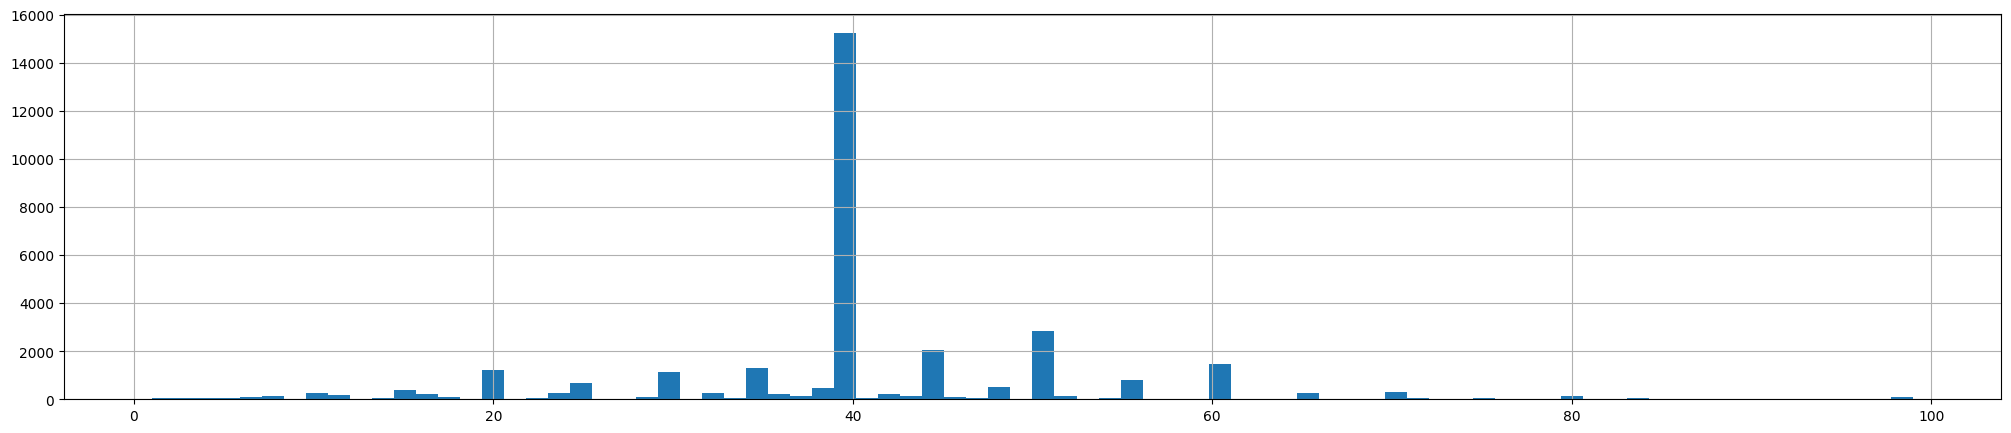

In [106]:
data['hours-per-week'].hist(figsize=(25,5), bins=80) # hist с опциональным аргументом bins для количества бинов гистограммы. 
#plt.show()

Постройте гистограмму для значений возраста. Есть ли однозначный пик у этого распределения?

<Axes: >

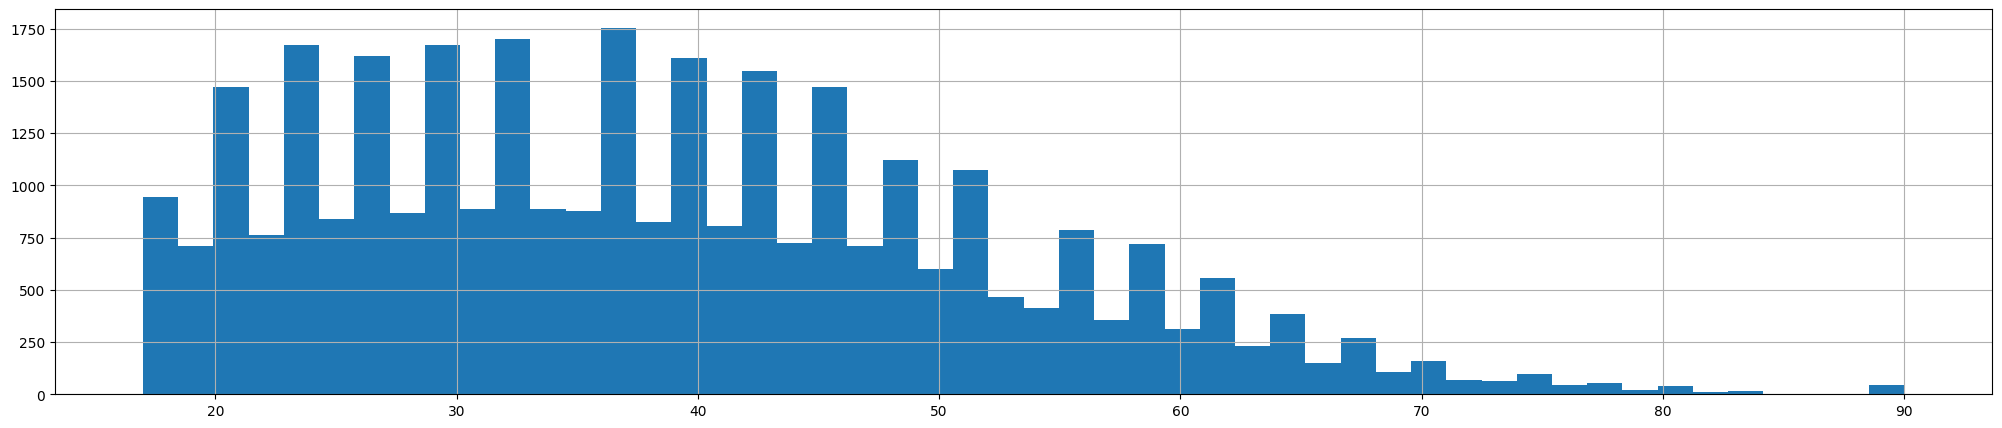

In [109]:
# You code here
data['age'].hist(figsize=(25,5), bins=50)

12. Посмотрим на более детальную гистограмму, используя [sns.countplot](https://seaborn.pydata.org/generated/seaborn.countplot.html) из библиотеки seaborn

In [110]:
import seaborn as sns

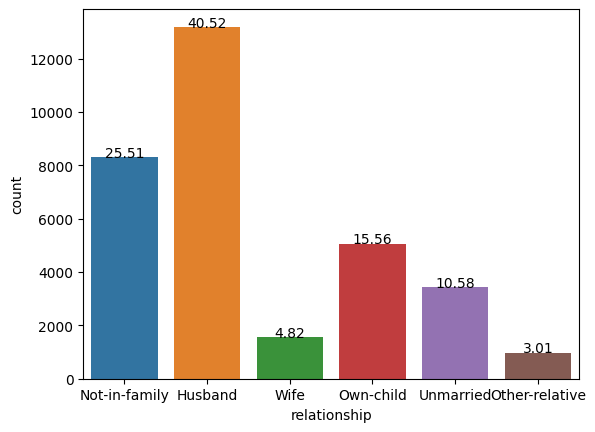

In [112]:
total = float(len(data))

ax = sns.countplot(x="relationship", data=data) # число наблюдений для каждого категориального значения
for p in ax.patches:
    height = p.get_height() # количество наблюдений в категории
    ax.text(p.get_x() + p.get_width() / 2., 
            height + 3,
            '{:1.2f}'.format((height/total) * 100), # создадим подпись в процентах от общего числа наблюдений
            ha="center") 
#plt.show()


Постройте подобный график для колонки `workclass` и `education`. Какие выводы можно сделать, глядя на эти графики?

<Axes: xlabel='workclass', ylabel='count'>

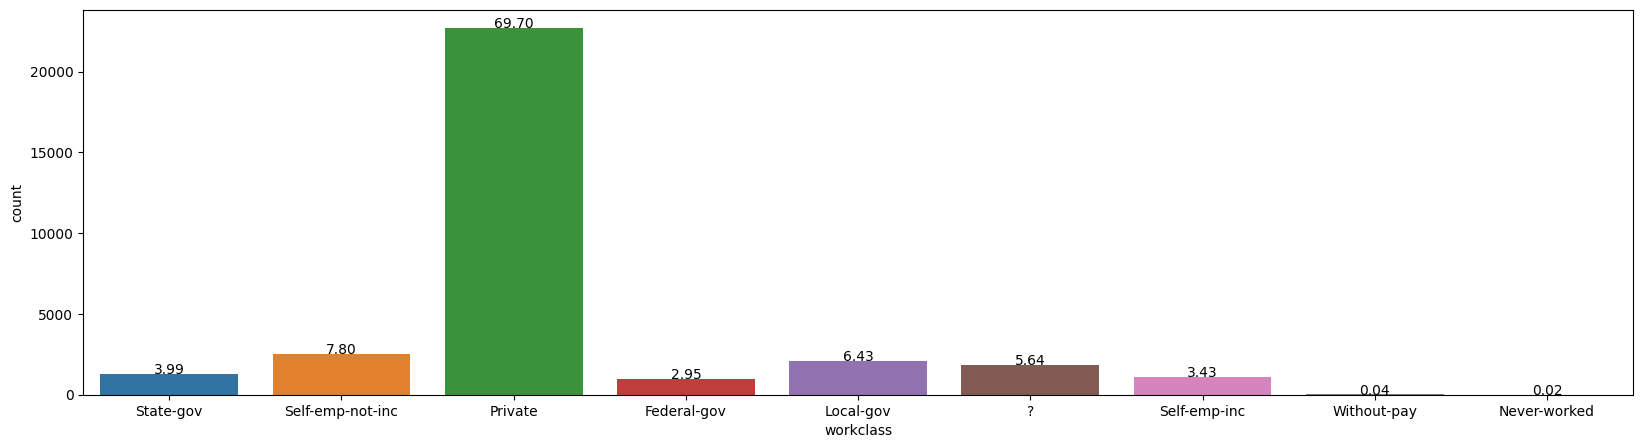

In [123]:
# You code here
def gist(field: str):
    total = float(len(data))
    fig, ax = plt.subplots(figsize=(20, 5))
    ax = sns.countplot(x=field, data=data, ax=ax) # число наблюдений для каждого категориального значения
    for p in ax.patches:
        height = p.get_height() # количество наблюдений в категории
        ax.text(p.get_x() + p.get_width() / 2., 
            height + 3,
            '{:1.2f}'.format((height/total) * 100), # создадим подпись в процентах от общего числа наблюдений
            ha="center") 
    return ax
gist('workclass')

<Axes: xlabel='education', ylabel='count'>

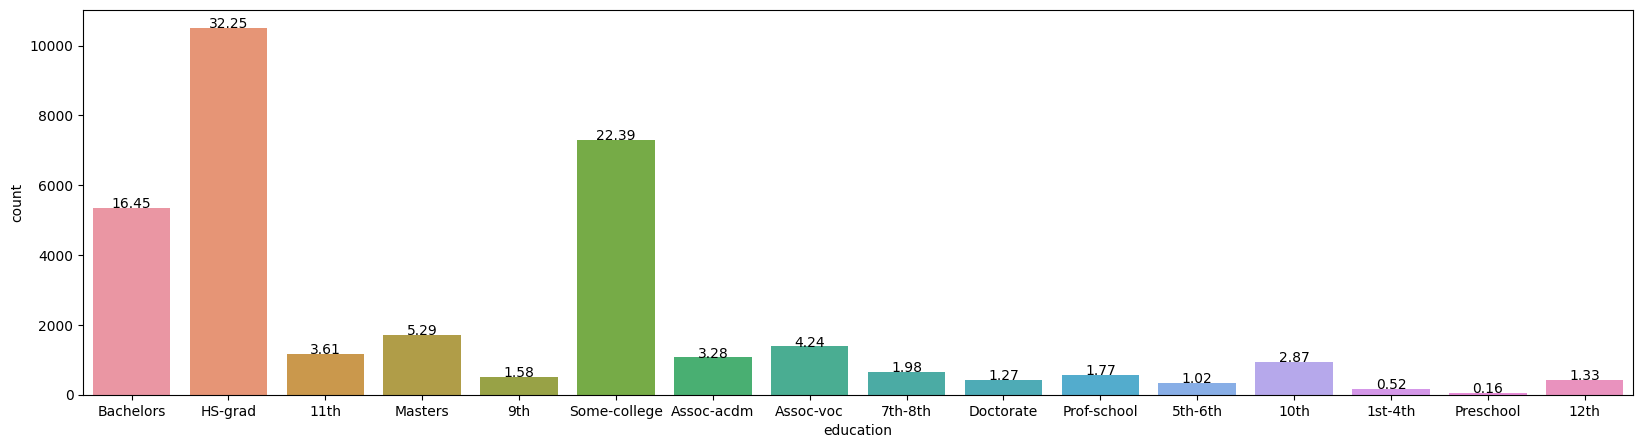

In [124]:
gist('education')